In [1]:
# Add all of your import statements here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('acs2015_county_data.csv')
dfc =  df.copy()
dfc_IE = dfc.loc[:,['IncomeErr']]
pd.options.display.max_columns = df.shape[1]

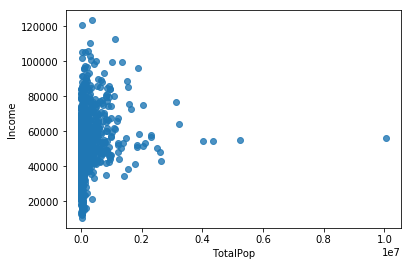

In [ ]:
x = df['TotalPop']
y = df['Income']

sns.regplot(x,y,fit_reg = False)

In [ ]:
states = pd.unique(df['State'])
states_alph = list(states)
states_alph.sort()
sdf = pd.DataFrame(np.zeros((states.size,len(list(df)[3:]))), index = states_alph, columns = list(df)[3:])
#add in state data by county
for i in range(df.shape[0]):
    sdf.loc[df['State'][i]] += df.iloc[i,3:]
sdf2 = sdf.copy()
#average data by state
state_occurance = df.groupby('State').count()['County']
for i in range(sdf.shape[0]):
    sdf.iloc[i,:] = sdf.iloc[i,:].divide(state_occurance[i])


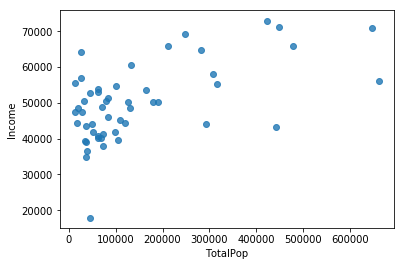

In [ ]:
sx = sdf['TotalPop']
sy = sdf['Income']
sns.regplot(sx,sy,fit_reg = False)

In [ ]:
dfc.drop('CensusId', axis=1, inplace=True)
dfc.drop('State', axis=1, inplace=True)
dfc.drop('County', axis=1, inplace=True)
dfc.drop('IncomeErr', axis=1, inplace=True)
dfc.drop('IncomePerCapErr', axis=1, inplace=True)
dfc.dropna(axis=0, how='any')

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,24974,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,27317,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,16824,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,18431,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,20532,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,10678,5660,5018,4.4,22.2,70.7,1.2,0.2,0.0,8057,31938.0,17580,24.6,38.4,18.8,15.0,19.7,20.1,26.4,74.9,14.9,0.7,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,20354,9502,10852,1.2,53.3,43.8,0.1,0.4,0.0,15581,32229.0,18390,25.4,39.2,27.5,16.6,21.9,10.3,23.7,84.5,12.4,0.0,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,116648,56274,60374,3.5,73.0,20.3,0.2,0.9,0.0,88612,41703.0,21374,20.5,31.6,27.3,17.7,24.2,10.5,20.4,85.3,9.4,0.2,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,34079,16258,17821,0.4,57.3,40.3,0.2,0.8,0.0,26462,34177.0,21071,21.6,37.2,23.3,14.5,26.3,11.5,24.4,85.1,11.9,0.2,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,26008,12975,13033,1.5,91.7,4.8,0.6,0.3,0.0,20600,36296.0,21811,19.2,30.1,29.3,16.0,19.5,13.7,21.5,83.9,12.1,0.2,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


In [ ]:
test = np.eye(4,dtype = float)
x = pd.DataFrame.as_matrix(dfc[dfc.columns.drop('Income')])
y = pd.DataFrame.as_matrix(dfc['Income'])
#additional numpy sanitizing since dropna kept missing a single nan value
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if type(x[i,j]) != type(test[1,1]):
            print(x[i,j], type(x[i,j]))
        if np.isnan(x[i,j]):
            print(i,j,'nan')
            x[i,j] = 0    
            
for i in range(y.shape[0]):
    if type(y[i]) != type(test[1,1]):
        print(y[i], type(y[i]))
    if np.isnan(y[i]):
        print(i,j,'nan')
        y[i] = 0   

548 12 nan
2673 30 nan


In [ ]:
clf = BayesianRidge(alpha_1=1.e-12,alpha_2=1.e-12,compute_score=True)
clf_fit = clf.fit(x,y)
y_pred = clf.predict(x, return_std=False)
myr2 = clf.score(x,y)
print(myr2)

0.890010893566


         TotalPop       Men     Women   Hispanic      White      Black  \
weights  0.012099  0.133895 -0.121793  53.639213 -56.691188 -28.006815   

             Native      Asian     Pacific   Citizen  IncomePerCap  \
weights  155.573924  479.92167 -304.390807 -0.019799      1.172788   

            Poverty  ChildPoverty  Professional     Service    Office  \
weights -546.639021    -48.850511     194.53118 -186.860721 -38.60945   

         Construction  Production      Drive    Carpool    Transit       Walk  \
weights     52.574064  -12.301803  21.611082  45.561705 -75.250965  11.217228   

         OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
weights    -35.53176   32.192138   262.106256 -0.009943   176.973571   

         PublicWork  SelfEmployed  FamilyWork  Unemployment  
weights  163.221018   -361.732127    27.44067      -83.4806  


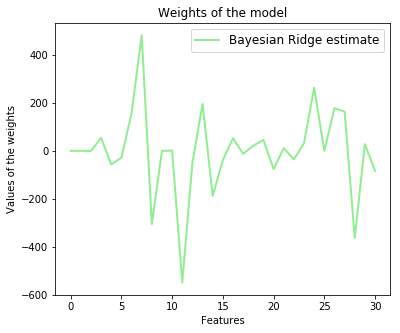

In [ ]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best",  prop=dict(size=12))
rowcoef_ = np.reshape(clf.coef_,[1,clf.coef_.size])
cf = pd.DataFrame(rowcoef_, index = ['weights'],columns = list(dfc[dfc.columns.drop('Income')]))
print(cf)